In [48]:
import json
import spotipy as sp
import pandas as pd

In [49]:
# Use Hydra later
config = json.load(open(file="config.json", encoding="utf-8"))
config

{'CLIENT_ID': '468b8b024bfb41d5b1957dad2afc766a',
 'CLIENT_SECRET': '8827668f8ed64f13bf8c2e83781c3997',
 'REDIRECT_URI': 'http://localhost:8080'}

In [50]:
scope = "user-read-recently-played"

In [51]:
auth = sp.SpotifyOAuth(client_id=config["CLIENT_ID"],
    client_secret=config["CLIENT_SECRET"],
    redirect_uri=config["REDIRECT_URI"])

In [52]:
sp = sp.Spotify(auth_manager=auth)

In [53]:
results = sp.current_user_recently_played()

In [54]:
play_count = {}
for item in results['items']:
    track = item['track']
    artist = track['artists'][0]['name']
    if artist in play_count:
        play_count[artist]+=1
    else:
        play_count[artist]=1

In [55]:
df = pd.DataFrame.from_dict(play_count, orient='index')
df.columns = ['Play Count']
df.sort_values(by='Play Count', inplace=True, ascending=False)
df.head()

,Play Count
Dominic Fike,5
Pierce The Veil,3
Dance Gavin Dance,3
Briston Maroney,3
STRFKR,2


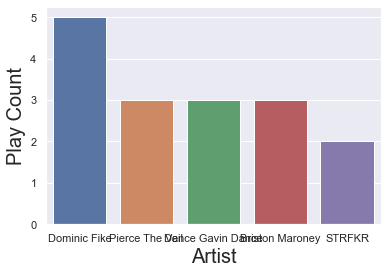

<Figure size 2160x2160 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5 = df.head()

sns.set()
sns.barplot(x=top_5.index, y=top_5['Play Count'])

plt.xlabel("Artist", fontsize=20)
plt.ylabel("Play Count", fontsize=20)
plt.figure(figsize=(30,30))

plt.show()

In [57]:
tracks = []
unique = []
for item in results['items']:
    track = item['track']
    if track['name'] in unique:
        continue
    info = [track['name'], track['album']['name'], track['artists'][0]['name']]
    tracks.append(info)
    unique.append(track['name'])
print(tracks[0])

['The Force Theme', 'The Force Theme', 'Far Out']


In [58]:
tracks_df = pd.DataFrame(tracks, columns=['Name', 'Album', 'Artist'])
tracks_df.head()

,Name,Album,Artist
0,The Force Theme,The Force Theme,Far Out
1,Today I Saw The Whole World,Misadventures,Pierce The Veil
2,Rad Drugz,The Darker The Weather // The Better The Man,MISSIO
3,Leave It All Behind,How It Feels to Be Lost,Sleeping With Sirens
4,Uneasy Hearts Weigh The Most,Dance Gavin Dance,Dance Gavin Dance


In [59]:
tracks_df[tracks_df['Artist'].str[0]=='E']

,Name,Album,Artist


In [60]:
results.keys()

dict_keys(['items', 'next', 'cursors', 'limit', 'href'])

In [61]:
print(results['items'][0].keys())
print(len(results['items']))

dict_keys(['track', 'played_at', 'context'])
50


In [62]:
item_dict = results['items'][0]

In [63]:
item_dict['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [64]:
item_dict['track']['id']

'4aydvxALWTpFih5ZDcwhMy'

In [65]:
item_dict['track']['artists'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/7aB2KbM3pphL9mU3dXbyh2'},
 'href': 'https://api.spotify.com/v1/artists/7aB2KbM3pphL9mU3dXbyh2',
 'id': '7aB2KbM3pphL9mU3dXbyh2',
 'name': 'Far Out',
 'type': 'artist',
 'uri': 'spotify:artist:7aB2KbM3pphL9mU3dXbyh2'}

In [66]:
item_dict['track']['name']

'The Force Theme'

In [67]:
item_dict['track']['album']

{'album_type': 'single',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7aB2KbM3pphL9mU3dXbyh2'},
   'href': 'https://api.spotify.com/v1/artists/7aB2KbM3pphL9mU3dXbyh2',
   'id': '7aB2KbM3pphL9mU3dXbyh2',
   'name': 'Far Out',
   'type': 'artist',
   'uri': 'spotify:artist:7aB2KbM3pphL9mU3dXbyh2'}],
 'available_markets': ['US'],
 'external_urls': {'spotify': 'https://open.spotify.com/album/3z77D2kiKWeJvcroIKWtUk'},
 'href': 'https://api.spotify.com/v1/albums/3z77D2kiKWeJvcroIKWtUk',
 'id': '3z77D2kiKWeJvcroIKWtUk',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab67616d0000b2736a1bb73ec0e80d4c9777c619',
   'width': 640},
  {'height': 300,
   'url': 'https://i.scdn.co/image/ab67616d00001e026a1bb73ec0e80d4c9777c619',
   'width': 300},
  {'height': 64,
   'url': 'https://i.scdn.co/image/ab67616d000048516a1bb73ec0e80d4c9777c619',
   'width': 64}],
 'name': 'The Force Theme',
 'release_date': '2017-12-14',
 'release_date_precision': 'day',
 'tota

In [68]:
item_dict['track']['explicit']

False

In [69]:
item_dict['track']['duration_ms']

188053

In [70]:
item_dict['track']['popularity']

37

In [71]:
item_dict['track']['is_local']

False

In [72]:
def get_info(track):
    track_id = track['id']
    song_name = track['name']
    album_id = track['album']['id']
    album_name = track['album']['name']
    artist_id = track['artists'][0]['id']
    artist_name = track['artists'][0]['name']
    explicit = track['explicit']
    duration = track['duration_ms']
    song_popularity = track['popularity']
    album_release_date = track['album']['release_date']
    return [track_id, song_name, album_id, album_name, artist_id,
        artist_name, explicit, duration, song_popularity, album_release_date]

In [73]:
all_tracks = []
for item in results['items']:
    all_tracks.append(get_info(item['track']))

In [74]:
headers = ['Track ID', 'Song Name', 'Album ID', 'Album Name', 'Artist ID',
    'Artist Name', 'Explicit', 'Duration', 'Song Popularity',
    'Album Release Date']
tracks_df = pd.DataFrame(all_tracks, columns=headers)
tracks_df.head()

,Track ID,Song Name,Album ID,Album Name,Artist ID,Artist Name,Explicit,Duration,Song Popularity,Album Release Date
0,4aydvxALWTpFih5ZDcwhMy,The Force Theme,3z77D2kiKWeJvcroIKWtUk,The Force Theme,7aB2KbM3pphL9mU3dXbyh2,Far Out,False,188053,37,2017-12-14
1,48vr34351V9Sz1QVxmbYNf,Today I Saw The Whole World,4wIX07SiESzMbSLCK3qCWQ,Misadventures,4iJLPqClelZOBCBifm8Fzv,Pierce The Veil,False,221960,56,2016-05-13
2,6nMBauRqzW8lqU9n3eBzw8,Rad Drugz,1lxOTjnDs6u4UHn2fzMNxu,The Darker The Weather // The Better The Man,2HOMW1liAxI3URnEq95SMS,MISSIO,True,228386,43,2019-04-12
3,48vr34351V9Sz1QVxmbYNf,Today I Saw The Whole World,4wIX07SiESzMbSLCK3qCWQ,Misadventures,4iJLPqClelZOBCBifm8Fzv,Pierce The Veil,False,221960,56,2016-05-13
4,5J1tThACf3JLPc3cC1neEH,Leave It All Behind,19BZXyyyJmxcCys5VDFOOB,How It Feels to Be Lost,3N8Hy6xQnQv1F1XCiyGQqA,Sleeping With Sirens,True,198248,57,2019-09-06


In [75]:
tracks_df['Analysis'] = sp.audio_features(tracks_df['Track ID'].to_list())
tracks_df.head()

,Track ID,Song Name,Album ID,Album Name,Artist ID,Artist Name,Explicit,Duration,Song Popularity,Album Release Date,Analysis
0,4aydvxALWTpFih5ZDcwhMy,The Force Theme,3z77D2kiKWeJvcroIKWtUk,The Force Theme,7aB2KbM3pphL9mU3dXbyh2,Far Out,False,188053,37,2017-12-14,"{'danceability': 0.309, 'energy': 0.831, 'key'..."
1,48vr34351V9Sz1QVxmbYNf,Today I Saw The Whole World,4wIX07SiESzMbSLCK3qCWQ,Misadventures,4iJLPqClelZOBCBifm8Fzv,Pierce The Veil,False,221960,56,2016-05-13,"{'danceability': 0.505, 'energy': 0.987, 'key'..."
2,6nMBauRqzW8lqU9n3eBzw8,Rad Drugz,1lxOTjnDs6u4UHn2fzMNxu,The Darker The Weather // The Better The Man,2HOMW1liAxI3URnEq95SMS,MISSIO,True,228386,43,2019-04-12,"{'danceability': 0.615, 'energy': 0.884, 'key'..."
3,48vr34351V9Sz1QVxmbYNf,Today I Saw The Whole World,4wIX07SiESzMbSLCK3qCWQ,Misadventures,4iJLPqClelZOBCBifm8Fzv,Pierce The Veil,False,221960,56,2016-05-13,"{'danceability': 0.505, 'energy': 0.987, 'key'..."
4,5J1tThACf3JLPc3cC1neEH,Leave It All Behind,19BZXyyyJmxcCys5VDFOOB,How It Feels to Be Lost,3N8Hy6xQnQv1F1XCiyGQqA,Sleeping With Sirens,True,198248,57,2019-09-06,"{'danceability': 0.555, 'energy': 0.925, 'key'..."


In [76]:
jsoned_tracks = pd.json_normalize(tracks_df['Analysis'])
jsoned_tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.309,0.831,7,-5.149,0,0.0932,0.009630,0.297000,0.1390,0.0844,143.342,audio_features,4aydvxALWTpFih5ZDcwhMy,spotify:track:4aydvxALWTpFih5ZDcwhMy,https://api.spotify.com/v1/tracks/4aydvxALWTpF...,https://api.spotify.com/v1/audio-analysis/4ayd...,188053,4
1,0.505,0.987,3,-2.154,0,0.0673,0.000411,0.000000,0.3650,0.5810,138.077,audio_features,48vr34351V9Sz1QVxmbYNf,spotify:track:48vr34351V9Sz1QVxmbYNf,https://api.spotify.com/v1/tracks/48vr34351V9S...,https://api.spotify.com/v1/audio-analysis/48vr...,221960,4
2,0.615,0.884,7,-4.965,1,0.0333,0.019800,0.000003,0.0841,0.5700,109.030,audio_features,6nMBauRqzW8lqU9n3eBzw8,spotify:track:6nMBauRqzW8lqU9n3eBzw8,https://api.spotify.com/v1/tracks/6nMBauRqzW8l...,https://api.spotify.com/v1/audio-analysis/6nMB...,228387,4
3,0.505,0.987,3,-2.154,0,0.0673,0.000411,0.000000,0.3650,0.5810,138.077,audio_features,48vr34351V9Sz1QVxmbYNf,spotify:track:48vr34351V9Sz1QVxmbYNf,https://api.spotify.com/v1/tracks/48vr34351V9S...,https://api.spotify.com/v1/audio-analysis/48vr...,221960,4
4,0.555,0.925,2,-4.008,0,0.1210,0.004020,0.000345,0.1220,0.3080,97.495,audio_features,5J1tThACf3JLPc3cC1neEH,spotify:track:5J1tThACf3JLPc3cC1neEH,https://api.spotify.com/v1/tracks/5J1tThACf3JL...,https://api.spotify.com/v1/audio-analysis/5J1t...,198248,4


In [77]:
jsoned_tracks.sort_values(by=['danceability'], ascending=False, inplace=True)
jsoned_tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
14,0.966,0.435,1,-4.944,1,0.0674,0.0604,0.22000,0.0511,0.561,111.160,audio_features,4MAADpR6MjelkaZqe3Mgnv,spotify:track:4MAADpR6MjelkaZqe3Mgnv,https://api.spotify.com/v1/tracks/4MAADpR6Mjel...,https://api.spotify.com/v1/audio-analysis/4MAA...,126386,4
16,0.935,0.560,0,-8.249,0,0.2080,0.3750,0.05660,0.0819,0.660,95.028,audio_features,47iwiNOjkzDG4I0dLRcHYr,spotify:track:47iwiNOjkzDG4I0dLRcHYr,https://api.spotify.com/v1/tracks/47iwiNOjkzDG...,https://api.spotify.com/v1/audio-analysis/47iw...,142335,4
26,0.900,0.538,7,-7.879,1,0.0343,0.2290,0.84300,0.2870,0.713,95.508,audio_features,4j4pPKE3xAblPIbhxScC1j,spotify:track:4j4pPKE3xAblPIbhxScC1j,https://api.spotify.com/v1/tracks/4j4pPKE3xAbl...,https://api.spotify.com/v1/audio-analysis/4j4p...,173693,4
29,0.900,0.538,7,-7.879,1,0.0343,0.2290,0.84300,0.2870,0.713,95.508,audio_features,4j4pPKE3xAblPIbhxScC1j,spotify:track:4j4pPKE3xAblPIbhxScC1j,https://api.spotify.com/v1/tracks/4j4pPKE3xAbl...,https://api.spotify.com/v1/audio-analysis/4j4p...,173693,4
20,0.886,0.371,5,-10.542,1,0.0465,0.3490,0.00138,0.0985,0.928,115.026,audio_features,6PuoZT4kgw5DrUEdnQ6e01,spotify:track:6PuoZT4kgw5DrUEdnQ6e01,https://api.spotify.com/v1/tracks/6PuoZT4kgw5D...,https://api.spotify.com/v1/audio-analysis/6Puo...,219261,4


In [78]:
merged_df = pd.merge(tracks_df, jsoned_tracks, how='inner', left_on='Track ID', right_on='id')
merged_df.drop(['Analysis'], inplace=True, axis=1)
merged_df.head()

,Track ID,Song Name,Album ID,Album Name,Artist ID,Artist Name,Explicit,Duration,Song Popularity,Album Release Date,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,4aydvxALWTpFih5ZDcwhMy,The Force Theme,3z77D2kiKWeJvcroIKWtUk,The Force Theme,7aB2KbM3pphL9mU3dXbyh2,Far Out,False,188053,37,2017-12-14,...,0.139,0.0844,143.342,audio_features,4aydvxALWTpFih5ZDcwhMy,spotify:track:4aydvxALWTpFih5ZDcwhMy,https://api.spotify.com/v1/tracks/4aydvxALWTpF...,https://api.spotify.com/v1/audio-analysis/4ayd...,188053,4
1,48vr34351V9Sz1QVxmbYNf,Today I Saw The Whole World,4wIX07SiESzMbSLCK3qCWQ,Misadventures,4iJLPqClelZOBCBifm8Fzv,Pierce The Veil,False,221960,56,2016-05-13,...,0.365,0.5810,138.077,audio_features,48vr34351V9Sz1QVxmbYNf,spotify:track:48vr34351V9Sz1QVxmbYNf,https://api.spotify.com/v1/tracks/48vr34351V9S...,https://api.spotify.com/v1/audio-analysis/48vr...,221960,4
2,48vr34351V9Sz1QVxmbYNf,Today I Saw The Whole World,4wIX07SiESzMbSLCK3qCWQ,Misadventures,4iJLPqClelZOBCBifm8Fzv,Pierce The Veil,False,221960,56,2016-05-13,...,0.365,0.5810,138.077,audio_features,48vr34351V9Sz1QVxmbYNf,spotify:track:48vr34351V9Sz1QVxmbYNf,https://api.spotify.com/v1/tracks/48vr34351V9S...,https://api.spotify.com/v1/audio-analysis/48vr...,221960,4
3,48vr34351V9Sz1QVxmbYNf,Today I Saw The Whole World,4wIX07SiESzMbSLCK3qCWQ,Misadventures,4iJLPqClelZOBCBifm8Fzv,Pierce The Veil,False,221960,56,2016-05-13,...,0.365,0.5810,138.077,audio_features,48vr34351V9Sz1QVxmbYNf,spotify:track:48vr34351V9Sz1QVxmbYNf,https://api.spotify.com/v1/tracks/48vr34351V9S...,https://api.spotify.com/v1/audio-analysis/48vr...,221960,4
4,48vr34351V9Sz1QVxmbYNf,Today I Saw The Whole World,4wIX07SiESzMbSLCK3qCWQ,Misadventures,4iJLPqClelZOBCBifm8Fzv,Pierce The Veil,False,221960,56,2016-05-13,...,0.365,0.5810,138.077,audio_features,48vr34351V9Sz1QVxmbYNf,spotify:track:48vr34351V9Sz1QVxmbYNf,https://api.spotify.com/v1/tracks/48vr34351V9S...,https://api.spotify.com/v1/audio-analysis/48vr...,221960,4


In [79]:
artist_freq = merged_df.groupby(['Artist ID'])['Artist ID'].count()
top_5_artist_ids = artist_freq.nlargest(5).index.to_list()
top_5_artist_ids

['4iJLPqClelZOBCBifm8Fzv',
 '7vtSUU3zpHeYJfX6BPNrJd',
 '6USv9qhCn6zfxlBQIYJ9qs',
 '6guC9FqvlVboSKTI77NG2k',
 '2Tz1DTzVJ5Gyh8ZwVr6ekU']

In [80]:
song_freq = merged_df.groupby(['Track ID'])['Track ID'].count()
top_5_track_ids = song_freq.nlargest(5).index.to_list()
top_5_track_ids

['48vr34351V9Sz1QVxmbYNf',
 '6Jqk2PWC70GEBNmXwmTGHp',
 '3jITkO2u1H36DMiMAMJWHj',
 '4j4pPKE3xAblPIbhxScC1j',
 '4keHa1UN3c9OWHVv3BE5ra']

In [81]:
danceability_df = merged_df.set_index('danceability')
danceability_df.sort_index(inplace=True, ascending=False)
danceability_df[['Song Name', 'Artist Name']].head()

,Song Name,Artist Name
danceability,,
0.966,Elastic,Joey Purp
0.935,Think About It,Verzache
0.900,Rawnald Gregory Erickson the Second,STRFKR
0.900,Rawnald Gregory Erickson the Second,STRFKR
0.900,Rawnald Gregory Erickson the Second,STRFKR


In [82]:
danceability_df.columns

Index(['Track ID', 'Song Name', 'Album ID', 'Album Name', 'Artist ID',
       'Artist Name', 'Explicit', 'Duration', 'Song Popularity',
       'Album Release Date', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [83]:
genre_seeds = sp.recommendation_genre_seeds()
genres = genre_seeds['genres']
print(genres)

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep', 'power-po

In [84]:
seed_genres = ['summer']
recommended = sp.recommendations(top_5_artist_ids)
recommended['tracks'][0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [85]:
all_recommended = []
for item in recommended['tracks']:
    all_recommended.append(get_info(item))

In [86]:
headers = ['Track ID', 'Song Name', 'Album ID', 'Album Name', 'Artist ID',
    'Artist Name', 'Explicit', 'Duration', 'Song Popularity',
    'Album Release Date']
recommended_df = pd.DataFrame(all_tracks, columns=headers)
recommended_df.head()

,Track ID,Song Name,Album ID,Album Name,Artist ID,Artist Name,Explicit,Duration,Song Popularity,Album Release Date
0,4aydvxALWTpFih5ZDcwhMy,The Force Theme,3z77D2kiKWeJvcroIKWtUk,The Force Theme,7aB2KbM3pphL9mU3dXbyh2,Far Out,False,188053,37,2017-12-14
1,48vr34351V9Sz1QVxmbYNf,Today I Saw The Whole World,4wIX07SiESzMbSLCK3qCWQ,Misadventures,4iJLPqClelZOBCBifm8Fzv,Pierce The Veil,False,221960,56,2016-05-13
2,6nMBauRqzW8lqU9n3eBzw8,Rad Drugz,1lxOTjnDs6u4UHn2fzMNxu,The Darker The Weather // The Better The Man,2HOMW1liAxI3URnEq95SMS,MISSIO,True,228386,43,2019-04-12
3,48vr34351V9Sz1QVxmbYNf,Today I Saw The Whole World,4wIX07SiESzMbSLCK3qCWQ,Misadventures,4iJLPqClelZOBCBifm8Fzv,Pierce The Veil,False,221960,56,2016-05-13
4,5J1tThACf3JLPc3cC1neEH,Leave It All Behind,19BZXyyyJmxcCys5VDFOOB,How It Feels to Be Lost,3N8Hy6xQnQv1F1XCiyGQqA,Sleeping With Sirens,True,198248,57,2019-09-06


In [87]:
tracks_df['Song Name'].unique()

array(['The Force Theme', 'Today I Saw The Whole World', 'Rad Drugz',
       'Leave It All Behind', 'Uneasy Hearts Weigh The Most',
       'Count Bassy', "Don't You", 'Wurli', 'Talking Myself in Circles',
       'Big Love (with EARTHGANG & MNDR)', 'Off The Grid', 'Elastic',
       'Listerine', 'Think About It', 'IMPATIENT', 'BS',
       'Chicken Tenders', 'This Must Be The Place', 'Little Lies',
       'Close To You', 'Double Negative (Skeleton Milkshake)',
       'All I Need', 'Miss Summer', 'Rawnald Gregory Erickson the Second',
       'Moments / Tides', 'Slipping Away', 'Sea Sick', 'Going Gets Tough',
       'Escalator', 'CALL OUT', 'Politics & Violence', 'TELL ME WHY',
       'Reptilia', 'hot tub DREAM Machine', 'Australia', 'Hundred',
       'Under My Skin', 'dropout',
       'Luv Is Dro (feat. Static Major & Bryson Tiller)', 'Iceblink Luck',
       'Lost In Translation', "I Don't Care - Single Version", 'Saturn'],
      dtype=object)

In [103]:
# song = danceability_df[danceability_df['Song Name']=='The Force Theme']
song = danceability_df.drop_duplicates()
song = song.head(10)
song.loc[:, ('energy', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'Song Name', 'Artist Name')]
# song.columns

,energy,acousticness,instrumentalness,liveness,valence,Song Name,Artist Name
danceability,,,,,,,
0.966,0.435,0.0604,0.220000,0.0511,0.561,Elastic,Joey Purp
0.935,0.560,0.3750,0.056600,0.0819,0.660,Think About It,Verzache
0.900,0.538,0.2290,0.843000,0.2870,0.713,Rawnald Gregory Erickson the Second,STRFKR
0.886,0.371,0.3490,0.001380,0.0985,0.928,This Must Be The Place,Sure Sure
0.875,0.649,0.4290,0.002370,0.0704,0.833,Close To You,Dayglow
0.817,0.577,0.1170,0.000385,0.1830,0.928,Sea Sick,binki
0.789,0.297,0.6880,0.567000,0.1090,0.497,Escalator,Ritt Momney
0.785,0.440,0.5530,0.000000,0.1030,0.568,Saturn,RIZ LA VIE
0.772,0.483,0.0521,0.000375,0.3770,0.479,Hundred,Khalid
